In [3]:
import pandas as pd
import numpy as np

In [4]:
CCTV_seoul = pd.read_csv('01. CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
CCTV_seoul.rename(columns={CCTV_seoul.columns[0] : '구별'}, inplace=True)
# rename - columns name 변경해줌
CCTV_seoul.head() 

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
CCTV_seoul['최근증가율'] = (CCTV_seoul['2016년'] + CCTV_seoul['2015년'] + \
                       CCTV_seoul['2014년']) / CCTV_seoul['2013년도 이전'] * 100
CCTV_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [7]:
pop_seoul = pd.read_excel('01. population_in_Seoul.xls',encoding = 'utf-8')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_seoul = pd.read_excel('01. population_in_Seoul.xls',
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding = 'utf-8')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_seoul.rename(columns={pop_seoul.columns[0] : '구별',
                          pop_seoul.columns[1] : '인구수',
                          pop_seoul.columns[2] : '한국인',
                          pop_seoul.columns[3] : '외국인',
                          pop_seoul.columns[4] : '고령자'}, inplace = True )
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [10]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] *100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] *100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [11]:
data_result = pd.merge(CCTV_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [12]:
# 의미없는 columns지우기 -- 행방향 삭제(drop), 열삭제(del)
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [13]:
# set_index ; 그래프 그릴때 row의 index가 구 이름이 되면 유리함
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 상관계수의 절대값이 클수록 두 데이터는 관계가 있다

 - **np.corrcoef(변수['columns'], 변수'['columns'])**--비교하고 싶은 데이터 끼리 묶기
 - 절대 값이 0.1이하면 무시, 0.3이하면 약한 상관관계, 0.7이하면 뚜렷한 상관관계
 - 대각선을 기준으로 대칭인 행렬이고 대각선 때고 다른 값으로 읽는다.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib이 기본적으로 가지고 있는 폰트는 한글을 지원하지 않는다,
# 그러므로 matplotlib의 폰트를 변경해야한다.

In [15]:
import platform 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False


In [16]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

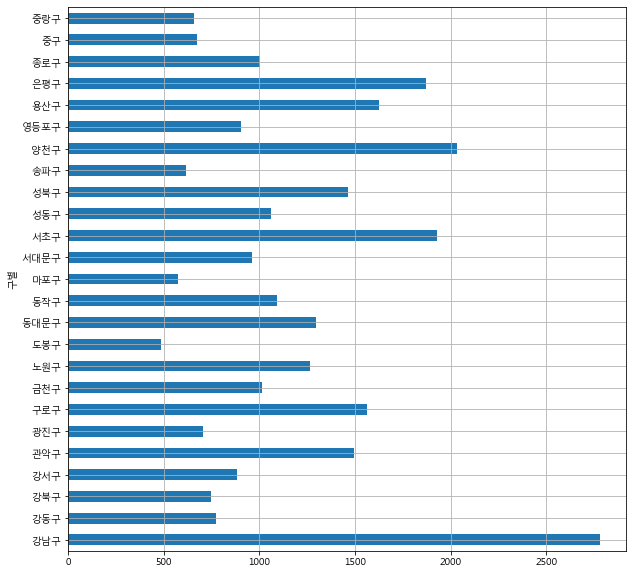

In [17]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

- 변수['columns'].plot(kind='barh',grid='True', figsize=(길이, 높이))
- kind='barh' -- 수평바
- grid= True --- 격자무늬
- figsize = (x축길이, y축길이)
- 변수['columns'].sort_values(ascending=True/False).plot(kind='',grid= ,등등) --- 길이별내림차순

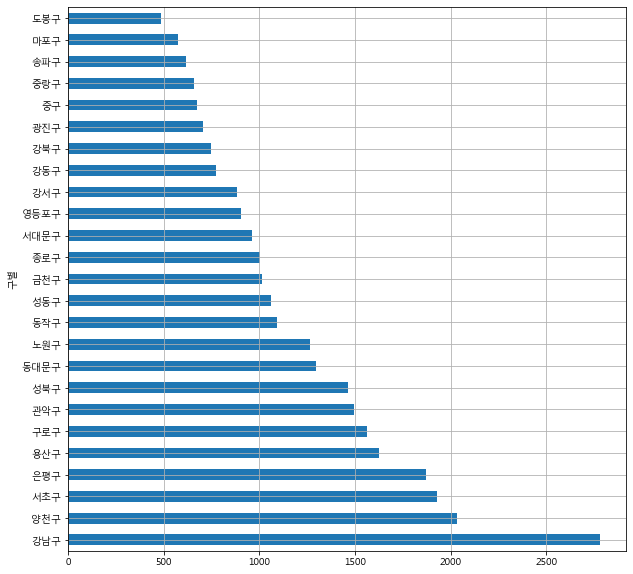

In [18]:
data_result['소계'].sort_values(ascending=False).plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

In [25]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']*100


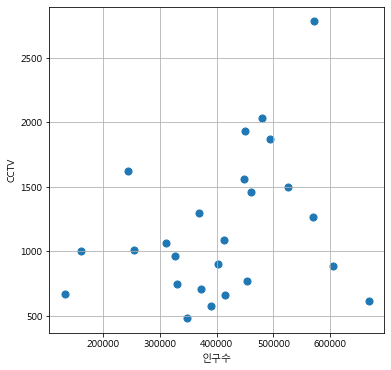

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### data를 대표하는 직선그리기
CCTV와 인구수는 양의 상관관계가 있다.

In [20]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [21]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

polyfit만들고poly1d에 넣어서 다항식만달기

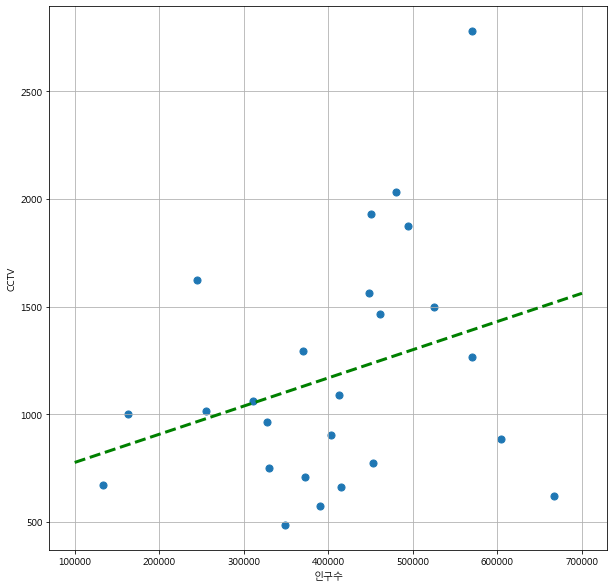

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls= 'dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [26]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
data_result['오차']=np.abs(data_result['소계']-f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차,CCTV비율
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355,0.487292
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312,0.092587
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512,0.423769
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794,0.428594
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690,0.665020


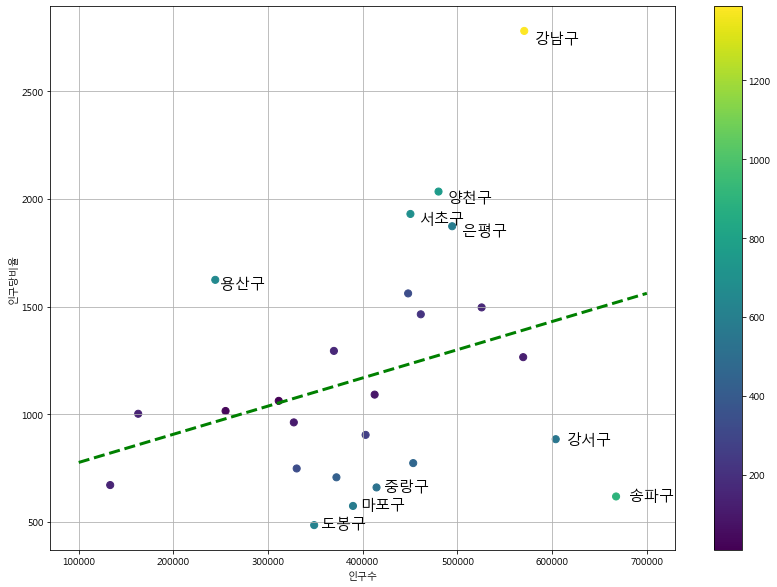

In [35]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],\
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    # 값바로 옆에 이름쓰기! 완전중요
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()